<a href="https://colab.research.google.com/github/Mercymerine/Amdari21DayDataChallenge/blob/main/jewellery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Set visualization theme
sns.set()

In [2]:
data = pd.read_csv('/content/Jewelry_Dataset.csv')
data.columns = [
    'Order_datetime',
    'Order_ID',
    'Product_ID',
    'SKU_Quantity',
    'Category_ID',
    'Category_alias',
    'Brand_ID',
    'Price_USD',
    'User_ID',
    'Target_Gender',
    'Main_color',
    'Main_metal',
    'Main_gem'
]
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category_alias,Brand_ID,Price_USD,User_ID,Target_Gender,Main_color,Main_metal,Main_gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [3]:
#Check for missing values
data.isnull().sum()

Order_datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category_alias     9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_color         7660
Main_metal         5462
Main_gem          34058
dtype: int64

In [4]:
#Data shape
data.shape

(95910, 13)

From this we can see that the last three columns must be of categorical type nad the SKU_quantity reaaly is not of any value since it is is not varied rather invaried.

In [5]:
# Feature cardinality
data.nunique()

Order_datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category_alias      218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_color            5
Main_metal            3
Main_gem             30
dtype: int64

From this we automatically know that the most important column is the price column

In [6]:
#Data description
data.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_color      88250 non-null  object 
 11  Main_metal      90448 non-null  object 
 12  Main_gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [8]:
#Check for duplicates
data.duplicated().sum()

2589

One unique value has a constant value thus no new piece of information can be added.

In [9]:
#Features with a cardinality of 1 (invariant features)
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()
invariant_features

['SKU_Quantity']

Label distribution is important in a classification model it ensures there is no imbaance but in our the regression task to check for the skew, this distribution makes it hard to learn about other prices.

In [10]:
# Check for label distributions
data['Price_USD'].skew()

18.95906072625981


Kurtosis is a statistical measure that describes the distribution of data points in a dataset. It indicates the extent to which data points cluster around the mean. Specifically, kurtosis measures the "tailedness" of the distribution—how heavy or light the tails are compared to a normal distribution.

There are three types of kurtosis:

Mesokurtic: This is the kurtosis of a normal distribution, which has a kurtosis value of 0 (excess kurtosis).
Leptokurtic: Distributions with positive kurtosis (> 0) have heavy tails and a sharp peak. This means there are more extreme values (outliers) than a normal distribution.
Platykurtic: Distributions with negative kurtosis (< 0) have light tails and a flatter peak. This indicates fewer extreme values compared to a normal distribution.

In [11]:
#Price Kurtosis
data['Price_USD'].kurtosis()

1054.8979068506155

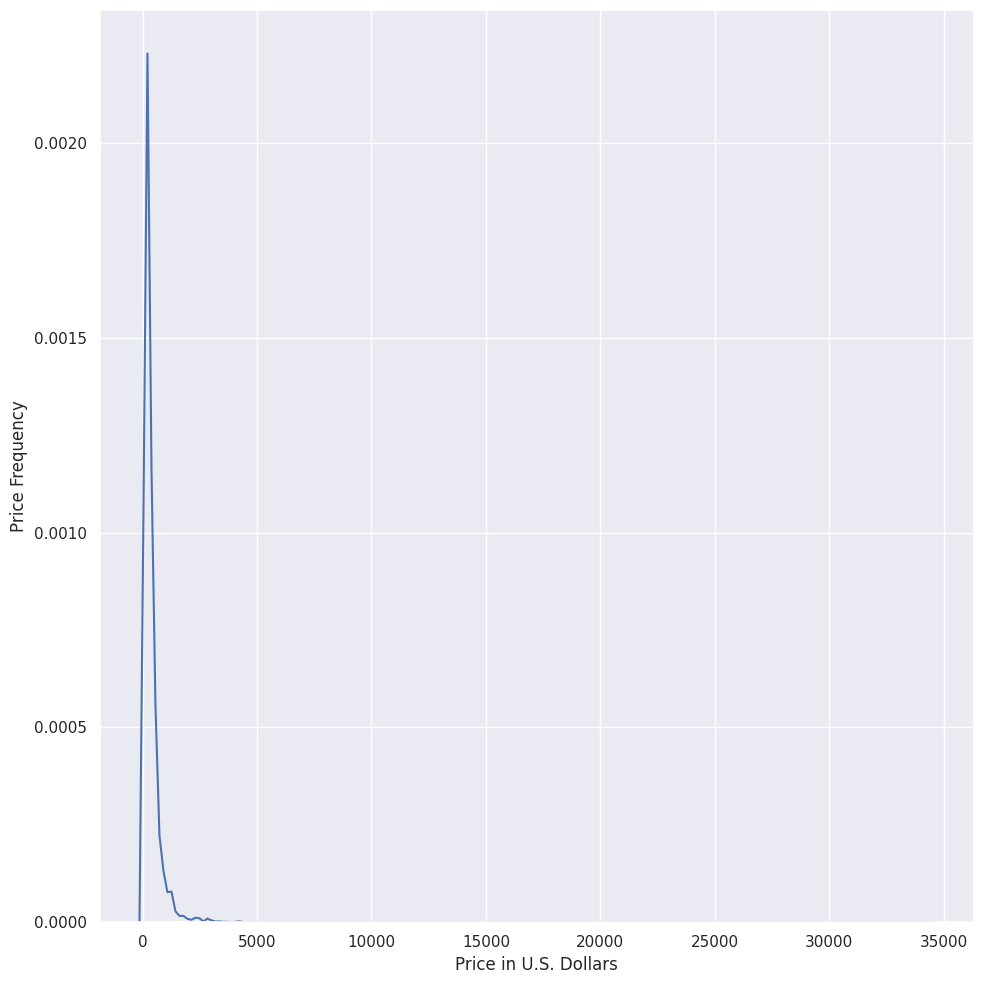

In [12]:
#Visualize distributions
plt.figure(figsize=(10, 10))
sns.kdeplot(data=data, x='Price_USD')

plt.xlabel("Price in U.S. Dollars")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show();plt.close()

Price at the peak are rare and also at the end of tail e.g 35000 are at rare prices hence rarely purchased

In [13]:
#Target gender analysis
data['Target_Gender'].value_counts(normalize=True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

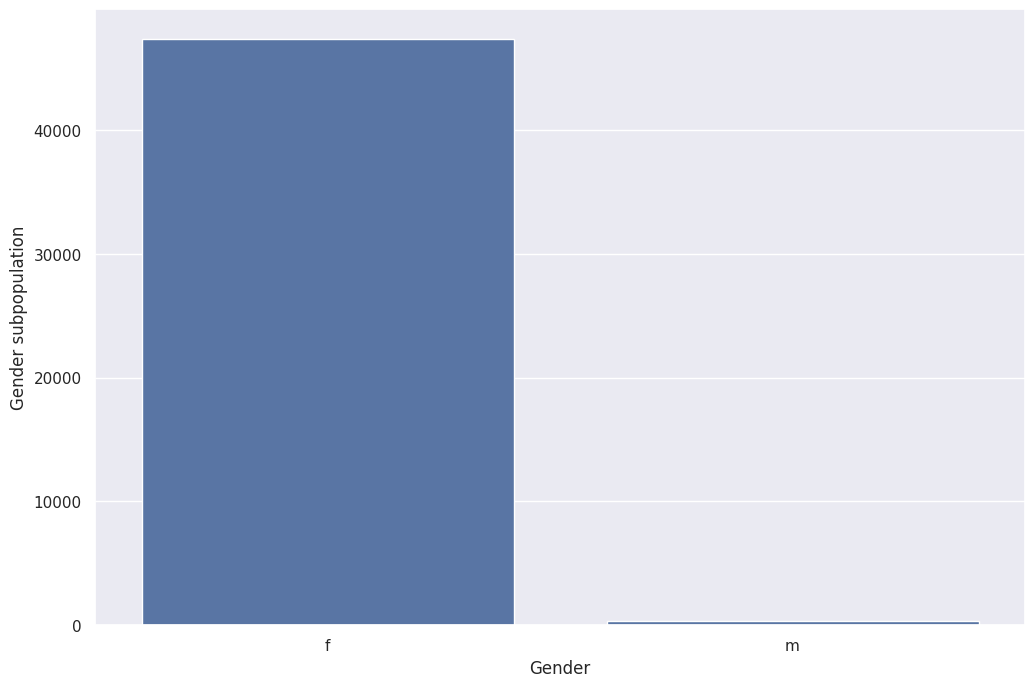

In [14]:
#Visualize target Gender
plt.figure(figsize=(12,8))

sns.countplot(data=data, x='Target_Gender')

plt.xlabel('Gender')
plt.ylabel('Gender subpopulation')

plt.show();plt.close()

Male jewellery are very low, probably they should start considering male jewelleries

In [15]:
#Jewelry category analysis
data['Category_alias'].value_counts()

Category_alias
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [16]:
data['Category_alias'].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [17]:
# Extract the actual categories
categories = data['Category_alias'].unique().tolist()
categories = [c for c in categories if isinstance (c, str) and 'jewelry' in c]
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

What if the missing values we had were due to the wrong categories?

In [18]:
#Pick out authentic data based on categories
real_categories = data.loc[data['Category_alias'].isin(categories)]
real_categories.shape

(80458, 13)

In [19]:
#Percentage of the missing values
100*data.isnull().sum()/len(data)

Order_datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category_alias    10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_color         7.986654
Main_metal         5.694922
Main_gem          35.510374
dtype: float64

After only working with the datasets containing the real categorical variables checking for the missing values, we realize they actually had an effect but after applying the real categorical variables the missing percentage reduces.

In [20]:
#Percentage of missing values: argument based on real categories
100*real_categories.isnull().sum()/len(real_categories)

Order_datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category_alias     0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_color         2.656044
Main_metal         0.110617
Main_gem          24.232519
dtype: float64

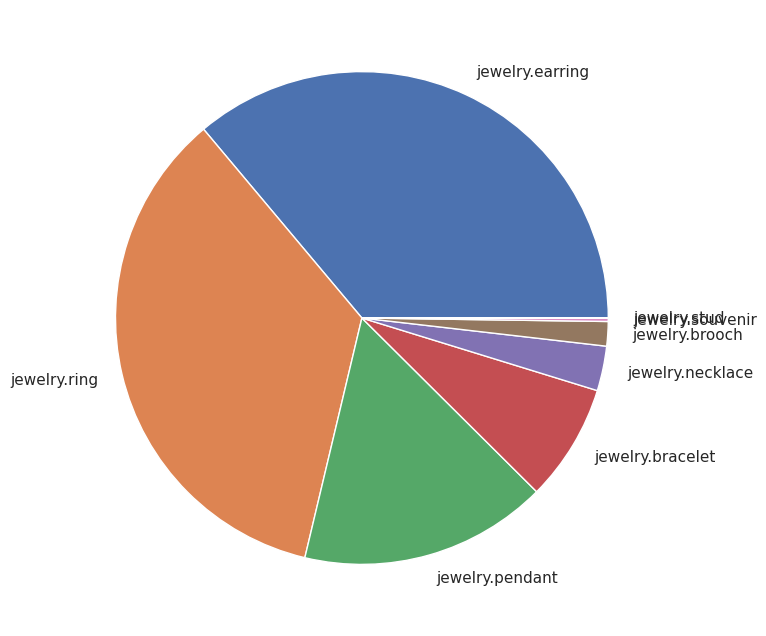

In [21]:
#Visualize the jewellery categories
subdata = real_categories['Category_alias'].value_counts()
jewellery_categories, count = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize=(12, 8))
plt.pie(x=count, labels=jewellery_categories)
plt.show();plt.close()

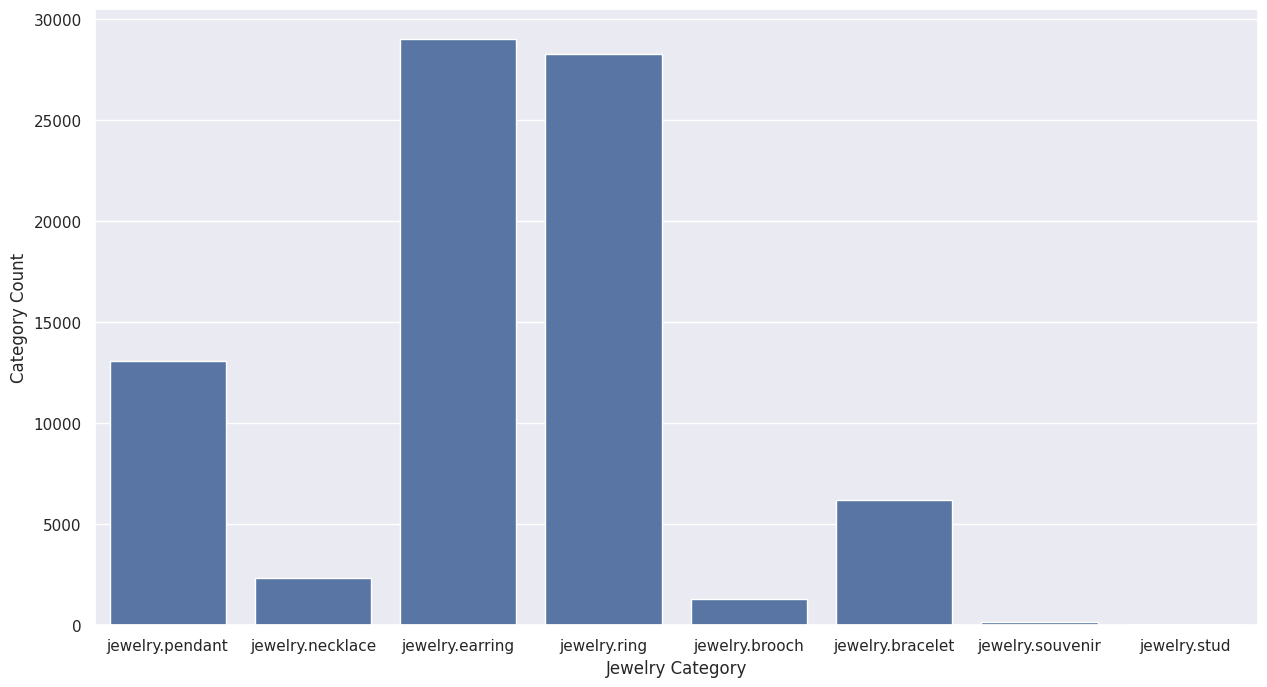

In [22]:
#Category count plot
plt.figure(figsize= (15, 8))

sns.countplot(data=real_categories, x='Category_alias')

plt.xlabel('Jewelry Category')
plt.ylabel('Category Count')

plt.show();plt.close()

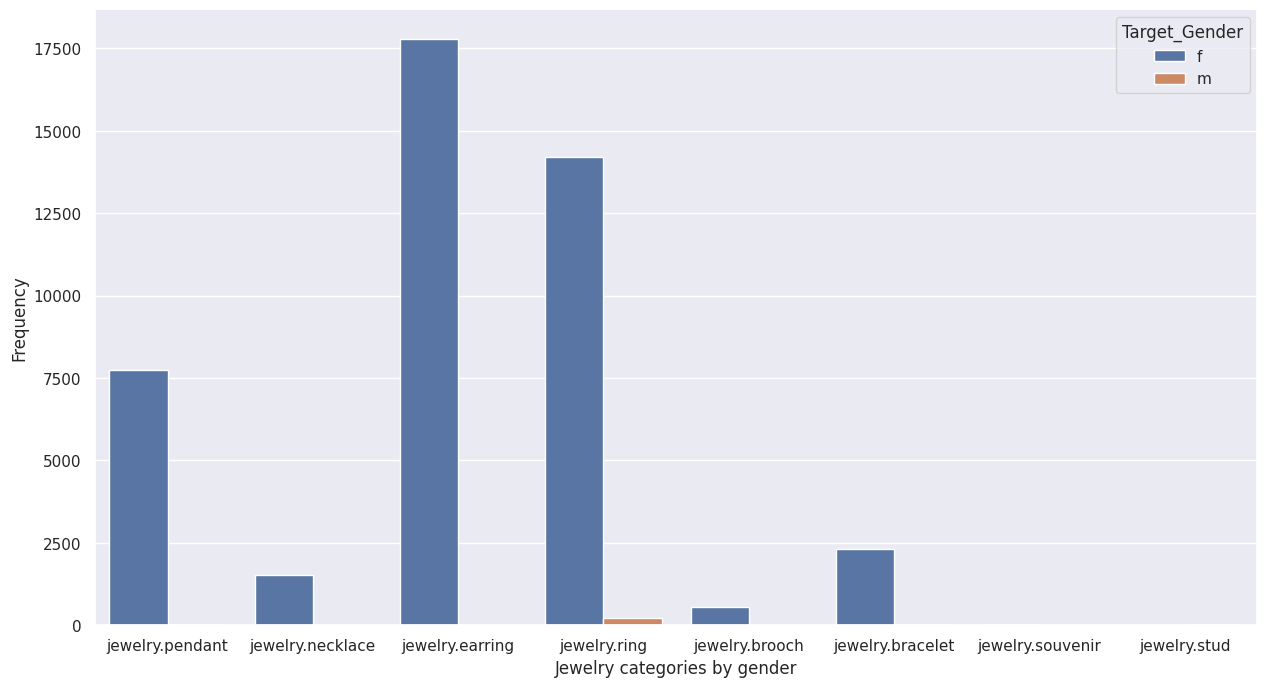

In [23]:
#Jewelry category by Gender
plt.figure(figsize=(15, 8))

sns.countplot(data=real_categories, x='Category_alias', hue='Target_Gender')

plt.xlabel('Jewelry categories by gender')
plt.ylabel('Frequency')
plt.show();plt.close()

In [24]:
#Gender skew in original data
data['Target_Gender'].value_counts(normalize=True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [25]:
#Gender skew in original data
real_categories['Target_Gender'].value_counts(normalize=True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

Skew is worse

**Encoding**

pd.factorize() is a function that converts unique values in a column into numerical codes (integers).

In [26]:
# Encode jewelry categories
encoded, category_encode = pd.factorize(real_categories['Category_alias'])
real_categories.loc[:, 'Category_alias'] = encoded

In [27]:
# Encode gender
encoded, category_encode = pd.factorize(real_categories['Target_Gender'])
real_categories.loc[:, 'Target_Gender'] = encoded

In [28]:
# Encode gems
encoded, category_encode = pd.factorize(real_categories['Main_gem'])
real_categories.loc[:, 'Main_gem'] = encoded

In [29]:
# Encode color
encoded, category_encode = pd.factorize(real_categories['Main_color'])
real_categories.loc[:, 'Main_color'] = encoded

In [30]:
# Encode metal
encoded, category_encode = pd.factorize(real_categories['Main_metal'])
real_categories.loc[:, 'Main_metal'] = encoded

In [31]:
real_categories.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category_alias,Brand_ID,Price_USD,User_ID,Target_Gender,Main_color,Main_metal,Main_gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_color      88250 non-null  object 
 11  Main_metal      90448 non-null  object 
 12  Main_gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [33]:
#Feature Correlation
correlations = real_categories.drop(labels=['Order_datetime', 'User_ID', 'Order_ID', 'Product_ID'], axis=1).corr(method = 'spearman')

In [34]:
correlations

,SKU_Quantity,Category_ID,Category_alias,Brand_ID,Price_USD,Target_Gender,Main_color,Main_metal,Main_gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category_alias,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


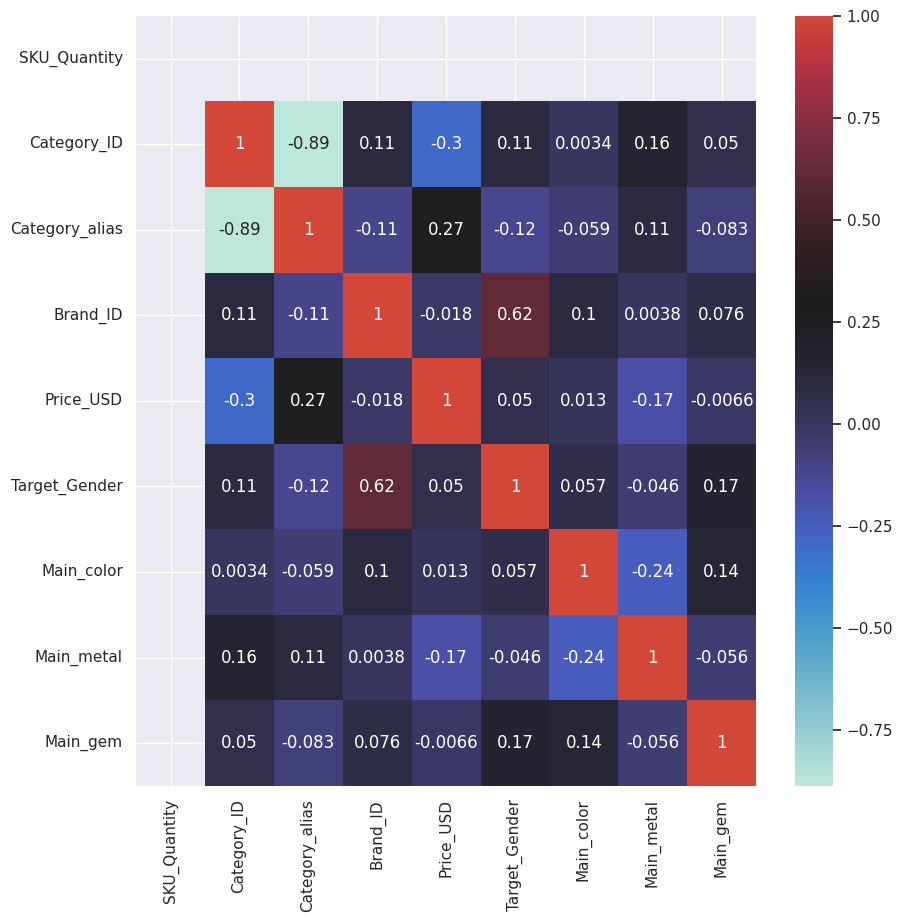

In [35]:
#Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True, center=.3)
plt.show(); plt.close()

In [36]:
#Set correlation limits
upper = 1
lower = 0.2

In [37]:
#Explicity
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [38]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category_alias': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category_alias'],
 'Target_Gender': ['Brand_ID'],
 'Main_color': [],
 'Main_metal': [],
 'Main_gem': []}

Data implications:
1.Missing values:  the missing values will be treated via an algorithmic
method: SimpleIMputer
2.Feature Encoding: the categorical features will be encoded
3.Redundant Features: certain features will be eliminated for a number of reasons. These are:
   a.SKU_Quantity: Feature Invariance
   b.ORDER_ID: Simpler identifier,has no real_world influence on jewelry price.
   c.Product_ID: Same with Order_ID
   d.Order_Datetime: Avoid Data leakage; would likely not to be available in real-world
4.Target Skew: The target variable is strongly right-skewed. This can be an issue when learning a mapping from the data space to  the label space. This issue will be fixed using the TransformerTargetRegressor utility .

High level steps:
*   Eliminate less useful features
*  Extract records with actual categories
*   Encode categorical features(if required)
*   Account for target skew





In [39]:
data.columns

Index(['Order_datetime', 'Order_ID', 'Product_ID', 'SKU_Quantity',
       'Category_ID', 'Category_alias', 'Brand_ID', 'Price_USD', 'User_ID',
       'Target_Gender', 'Main_color', 'Main_metal', 'Main_gem'],
      dtype='object')

In [40]:
# Columns to eliminate
columns_to_eliminate =[
    'SKU_Quantity',
    'Order_ID',
    'Product_ID',
     'User_ID',
    'Category_ID',

]

In [41]:
data.drop(columns = columns_to_eliminate, axis=1, inplace=True)

In [42]:
data.drop(columns='Order_datetime', axis=1, inplace=True)

In [43]:
data.shape

(95910, 7)

In [44]:
data.head()

,Category_alias,Brand_ID,Price_USD,Target_Gender,Main_color,Main_metal,Main_gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [45]:
#Eliminate unrealistic categories
data = data.loc[data['Category_alias'].isin(categories), :]

In [46]:
data.shape

(80458, 7)

In [47]:
data['Brand_ID'].unique()

array([ 1.,  0.,  2.,  4., nan,  5.,  3.])

NOTE: Most of the data preparations will be carried out via the use of PIpeline class from scikit. The Pipeline object allows us to chain transformers and estimators sequentially for use as one composite object.


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = data.drop(columns='Price_USD', axis=1)
y = data['Price_USD']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

**DATA MODELLING**
1.Linear Regressions
2.Extremely Random forest(ExtraTrees),
3.Adaptive Boosting (AdaBoost), and
4.Catboost

In [51]:
!pip install catboost

In [52]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor

In [53]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode =  False):
  #Fix missing values
  first_transformer = ColumnTransformer(
      transformers = [
          ('imputer', SimpleImputer(strategy = 'most_frequent'), column_indices)
      ],
      remainder = 'passthrough',
      sparse_threshold = 0.
  )

  #One Hot Encode
  second_transformer = ColumnTransformer(
      transformers = [
          ('one_hot', OneHotEncoder(), categorical_indices)
      ],
      remainder = 'passthrough',
      sparse_threshold =0.
  )
  #Ordinal Encode
  third_transformer = ColumnTransformer(
      transformers = [
          ('ordinal', OrdinalEncoder(), categorical_indices)
      ],
      remainder = 'passthrough',
      sparse_threshold = 0.
  )

  steps = []


  if fill_missing:
    steps.append(('first', first_transformer))

  if label_encode:
    steps.append(('second', third_transformer))

  if one_hot:
    steps.append(('third', second_transformer))

  # Append the model as a tuple to the steps list
  steps.append(('model', model))
  model_pipe = Pipeline(steps = steps)

  return model_pipe

In [54]:
#Generate indices
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c  not in ['Brand_ID']]
categorical_indices = [columns.index(c) for c in categorical_features]

In [55]:
categorical_indices

[0, 2, 3, 4, 5]

In [56]:
#CatBoost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = 'RMSE', iterations = 1000, learning_rate = 0.1, one_hot_max_size=2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot=False, label_encode=True
)

In [57]:
#LR pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot=True, label_encode=False
)

In [58]:
#AdaBoost pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = 'exponential', n_estimators = 1000, learning_rate = 0.01),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot=True, label_encode=False
)

In [59]:
#Extra pipeline
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = 'friedman_mse', n_estimators = 1000, bootstrap=True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot=True, label_encode=False
)

In [60]:
from sklearn.preprocessing import PowerTransformer

In [61]:
#Transform targets
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer=PowerTransformer(method = 'box-cox'))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer=PowerTransformer(method = 'box-cox'))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer=PowerTransformer(method = 'box-cox'))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer=PowerTransformer(method = 'box-cox'))



In [62]:
#Fit CatBoost
cat_pipe.fit(X_train, y_train)

0:	learn: 0.9626722	total: 76.3ms	remaining: 1m 16s
1:	learn: 0.9246228	total: 103ms	remaining: 51.5s
2:	learn: 0.8974304	total: 129ms	remaining: 42.8s
3:	learn: 0.8700745	total: 155ms	remaining: 38.5s
4:	learn: 0.8501686	total: 172ms	remaining: 34.3s
5:	learn: 0.8338325	total: 203ms	remaining: 33.7s
6:	learn: 0.8151113	total: 223ms	remaining: 31.6s
7:	learn: 0.7993978	total: 239ms	remaining: 29.7s
8:	learn: 0.7891006	total: 263ms	remaining: 29s
9:	learn: 0.7791368	total: 292ms	remaining: 28.9s
10:	learn: 0.7687062	total: 305ms	remaining: 27.5s
11:	learn: 0.7608730	total: 318ms	remaining: 26.2s
12:	learn: 0.7547379	total: 342ms	remaining: 25.9s
13:	learn: 0.7491475	total: 371ms	remaining: 26.1s
14:	learn: 0.7442857	total: 401ms	remaining: 26.3s
15:	learn: 0.7378749	total: 434ms	remaining: 26.7s
16:	learn: 0.7341242	total: 473ms	remaining: 27.4s
17:	learn: 0.7280667	total: 506ms	remaining: 27.6s
18:	learn: 0.7245645	total: 538ms	remaining: 27.8s
19:	learn: 0.7195995	total: 570ms	remaini

TransformedTargetRegressor(regressor=Pipeline(steps=[('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x7af720d443d0>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [63]:
#Fit LR
lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [64]:
y_train.unique()

array([ 146.68, 1150.55,  198.49, ...,  610.23,  254.26,  244.08])

In [65]:
#Fit AdaBoost
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [66]:
#Fit CatBoost
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

**MODEL EVALUATION**

*   R2
*   RMSE(Root mean squared error)



In [67]:
from sklearn.metrics import r2_score, mean_squared_error

In [68]:
def root_mean_squared_error(y_true, y_pred):
  value = mean_squared_error(y_true, y_pred)
  return np.sqrt(value)

In [69]:
def generate_model_score(model, data, metric_function):
  X, y = data
  y_ = model.predict(X)
  score = metric_function(y, y_)
  return score

In [70]:
def print_metrics(metric_name, train_score, test_score):
  print(f'Train {metric_name} = {train_score}')
  print(f'Test {metric_name} = {test_score}')
  print(f'Generalization error = {train_score - test_score}')
  return

In [71]:
def test_model(model, data, metric_name, metric_function):
  train, test = data

  if isinstance(metric_name, str): #Single metric
    train_score = generate_model_score(model, train, metric_name, metric_function)
    test_score = generate_model_score(model, test, metric_name, metric_function)
    print_metrics(metric_name, train_score, test_score)

  else: #MUltiple metrics
    for name, function in zip(metric_name, metric_function):
      train_score = generate_model_score(model, train, function)
      test_score = generate_model_score(model, test, function)
      print_metrics(name, train_score, test_score)

  return

In [72]:
# Name and functions for metrics
metric_name = ['R2','RMSE']
metric_function = [r2_score, root_mean_squared_error]


In [73]:
#Create data variables
data_ =[
    [X_train, y_train],
    [X_test, y_test]]


In [74]:

# Test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)

Train R2 = 0.3012981838580515
Test R2 = 0.30185472731818164
Generalization error = -0.0005565434601301211
Train RMSE = 365.4754524152647
Test RMSE = 389.11094436550025
Generalization error = -23.63549195023552


In [75]:
# Test LR
test_model(lin_pipe, data_, metric_name, metric_function)

Train R2 = 0.07239637360189644
Test R2 = 0.060758016405359605
Generalization error = 0.01163835719653683
Train RMSE = 421.1080031170312
Test RMSE = 451.3248992808008
Generalization error = -30.216896163769604


In [78]:
# Test adaBoost
test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = 0.0727724661572492
Test R2 = 0.06777496185992915
Generalization error = 0.004997504297320043
Train RMSE = 421.0226263262989
Test RMSE = 449.6358461067683
Generalization error = -28.61321978046942


In [79]:
# Test extatreeas
test_model(extra_pipe, data_, metric_name, metric_function)

Train R2 = 0.2088999042473435
Test R2 = 0.23749155018441603
Generalization error = -0.02859164593707253
Train RMSE = 388.8910916533773
Test RMSE = 406.65196549091087
Generalization error = -17.760873837533552
